# TITLE
## Summer 2024 Data Science Project

**By Matvey Lyapin**

### Introduction

### Data Curation

In [151]:
## Import important stuff.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator # for nice-lookin plots
import scipy.stats as statsim
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
xlsx = pd.ExcelFile("datasets/whr/src/WHR_Tab2.1.xls")
whole_whr = pd.read_excel(xlsx, "Sheet1")
print(whole_whr)

     Country name  year  Life Ladder  Log GDP per capita  Social support  \
0     Afghanistan  2008     3.723590            7.350416        0.450662   
1     Afghanistan  2009     4.401778            7.508646        0.552308   
2     Afghanistan  2010     4.758381            7.613900        0.539075   
3     Afghanistan  2011     3.831719            7.581259        0.521104   
4     Afghanistan  2012     3.782938            7.660506        0.520637   
...           ...   ...          ...                 ...             ...   
2358     Zimbabwe  2019     2.693523            7.697755        0.759162   
2359     Zimbabwe  2020     3.159802            7.596050        0.717243   
2360     Zimbabwe  2021     3.154578            7.656878        0.685151   
2361     Zimbabwe  2022     3.296220            7.670073        0.666172   
2362     Zimbabwe  2023     3.572386            7.678590        0.693817   

      Healthy life expectancy at birth  Freedom to make life choices  \
0              

In [6]:
whr = whole_whr[['Country name', 'year', 'Life Ladder']]
print(whr)

     Country name  year  Life Ladder
0     Afghanistan  2008     3.723590
1     Afghanistan  2009     4.401778
2     Afghanistan  2010     4.758381
3     Afghanistan  2011     3.831719
4     Afghanistan  2012     3.782938
...           ...   ...          ...
2358     Zimbabwe  2019     2.693523
2359     Zimbabwe  2020     3.159802
2360     Zimbabwe  2021     3.154578
2361     Zimbabwe  2022     3.296220
2362     Zimbabwe  2023     3.572386

[2363 rows x 3 columns]


### Exploratory Data Analysis

### Primary Analysis

In [200]:
class HapModel:
    def __init__(self, country):
        country_whr = whr[whr['Country name'] == country]

        self.name = country
        self.X = country_whr['year'].to_numpy().reshape(-1, 1)
        self.y = country_whr['Life Ladder'].to_numpy().reshape(-1, 1)
        self.model = LinearRegression().fit(self.X, self.y)
        self.y_pred = self.model.predict(self.X)
        self.mse = mean_squared_error(self.y, self.y_pred)
        self.r2 = r2_score(self.y, self.y_pred)

    def transform_axes(self, axes):
        axes.scatter(self.X, self.y, color='blue', label='Data')
        axes.plot(self.X, self.y_pred, color='red', label='Linear Regression')
        axes.xaxis.set_major_locator(MaxNLocator(integer=True))
        axes.set_title(f'{self.name}\'s Life Ladder Over Time')
        axes.set_ylabel('Life Ladder Score')
        axes.set_xlabel('Year')
        axes.legend()

    def report(self):
        fig, axes = plt.subplots()
        self.transform_axes(axes)

        plt.show()
        print(f'{self.name} regression performance metrics:')
        print(f' - MSE: {self.mse}')
        print(f' - R2: {self.r2}')
    
        

    def predict_happiness(self, year):
        return self.model.predict([[year]]).clip(min=0)[0][0]

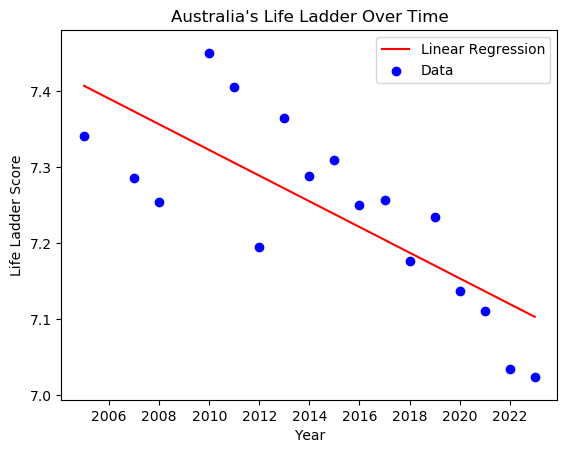

Australia regression performance metrics:
 - MSE: 0.00554631193727816
 - R2: 0.587066434865066


7.069646417320548

In [201]:
h1 = HapModel('Australia')
h1.report()
h1.predict_happiness(2025)

In [195]:
def get_prediction_table(year):
    gwhr = whr[whr['year'] >= 2022].groupby(['Country name']).count()
    slr_whr_countries = gwhr[gwhr['Life Ladder'] >= 2]
    slindex = slr_whr_countries.index.to_numpy()
    d = {
        'Country name': slindex,
        f'Predicted Life Ladder in {year}': (np.vectorize(lambda x: HapModel(x).predict_happiness(year)))(slindex),
        'R2 of Regression': (np.vectorize(lambda x: HapModel(x).r2))(slindex), 'Data Points Used': (np.vectorize(lambda x: HapModel(x).X.size))(slindex)
        }

    result = pd.DataFrame(d).sort_values(by=[f'Predicted Life Ladder in {year}'], ascending=False).reset_index(drop=True)
    result.index += 1
    return result

pt = get_prediction_table(2026)
len(pt)

135

In [197]:
pt = pt[pt['R2 of Regression'] >= 0.5]
len(pt)

41

In [198]:
print(pt.head(20).to_string())

                Country name  Predicted Life Ladder in 2026  R2 of Regression  Data Points Used
12                 Australia                       7.052777          0.587066                17
13                   Czechia                       7.013714          0.578525                15
15                    Serbia                       6.915463          0.887250                16
16                   Romania                       6.909833          0.797432                17
17                 Lithuania                       6.867630          0.624491                18
18                    Kosovo                       6.857168          0.570424                17
19                    Canada                       6.856851          0.730087                18
20                 Nicaragua                       6.836127          0.775525                18
21                  Slovenia                       6.832096          0.657631                16
22                   Uruguay            

In [194]:
print(pt.tail(20).to_string())

               Country name  Predicted Life Ladder in 2026  R2 of Regression  Data Points Used
47   Bosnia and Herzegovina                       6.179224          0.761844                16
56                 Mongolia                       6.101717          0.853641                16
58                 Bulgaria                       6.083610          0.912811                15
59               Kyrgyzstan                       6.077094          0.701220                18
70               Montenegro                       5.850171          0.592149                15
76      Congo (Brazzaville)                       5.763923          0.644126                14
77              Ivory Coast                       5.743164          0.579203                12
78               Tajikistan                       5.726268          0.571426                18
79                   Guinea                       5.678452          0.613315                13
80          North Macedonia                       

### Visualization

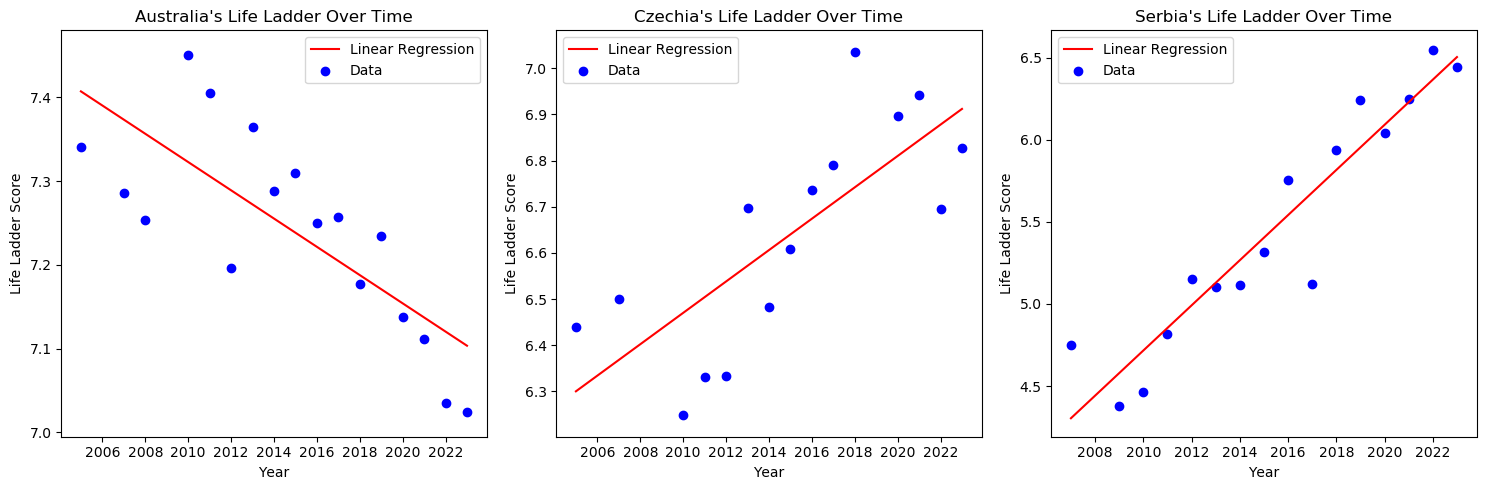

In [205]:
num_plots = 3
country_list = pt.head(num_plots)['Country name'].to_list()
fig, axes = plt.subplots(1,num_plots, figsize=(15, 5))

for i in range(len(country_list)):
  HapModel(country_list[i]).transform_axes(axes[i])

plt.tight_layout()
plt.show()

### Insights and Conclusions